In [53]:
%matplotlib inline
%load_ext autoreload 
%autoreload 2

from __future__ import division

import numpy as np
import os
#import mne
import pandas as pd
import matplotlib.pyplot as plt

from scipy import io, signal

from data_utils import *
from preprocessing import *
from models import *
from metrics import *

from sklearn.linear_model import LogisticRegression as LR

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [68]:
X_s, Y_s, Y_l = import_data(-1, downsample=5)

Converting time column to int64...
Converting time column to int64...
Converting time column to int64...
Converting time column to int64...
Converting time column to int64...
Converting time column to int64...
Converting time column to int64...
Converting time column to int64...
Converting time column to int64...
Converting time column to int64...
Converting time column to int64...
Converting time column to int64...
Converting time column to int64...
inconsistent number of epochs and labels:                        
	 expected:132 have:132


In [37]:
X, Y = X_s[0], Y_s[0]

label = 1
Y = (Y == label).astype(float)
X, Y = window_series(X, Y, width=500, fs=200, stride=100)

def split(x, split=.33):
    point = int(len(x)*split)
    return x[:point], x[point:]

(X_train, X_test), (Y_train, Y_test) = map(split, (X, Y))

print "ratio of true:false : ", sum(Y)/len(Y)

ratio of true:false :  0.331462715491


In [16]:
lim = 1000
XX_train, XX_test, YY_train, YY_test = map(lambda x: [x[i] for i in np.random.permutation(len(x))][:lim], [X_train, X_test, Y_train, Y_test])

In [17]:
model = MACE_filter()
Yscore_pred = model.fit(XX_train, YY_train).predict_score(XX_test)

(6400, 1000) (1000, 1000) (1000, 1)


In [19]:
power = lambda x: np.sum(x**2)

print power(np.real(model.H))
print power(np.imag(model.H))

1.93514708601e-27
1.25162047847e-27


In [ ]:
plt.imshow(win1)
plt.colorbar()

In [ ]:
H = model.H.reshape(64,100)
plt.imshow(np.abs(fftpack.ifft2(H)))
plt.colorbar()

In [ ]:
# test
H = model.H.squeeze()
mapper = lambda win: np.abs(fftpack.fft2(win).reshape(-1).dot(H))**2
Y_pred = map(mapper, X_test)

In [ ]:
end = 2000
t = np.linspace(0,len(Y_test)/(200/20), len(Y_test))[:end]


plt.plot(t, np.array(Y_pred)[:end]/max(Y_pred[:end]))
plt.plot(t, np.array(Y_test)[:end])

In [ ]:
plt.plot(Y[:10000])
plt.plot(Y_s[0][:10000])
plt.plot((Y_s[0][:10000]==3).astype(float))

In [ ]:
# training set
H = model.H.squeeze()
mapper = lambda win: np.abs(fftpack.fft2(win).reshape(-1).dot(H))**2
Y_pred2 = map(mapper, X_train)
#

end = 8000
t = np.linspace(0,len(Y_train)/(200/20), len(Y_train))[:end]


plt.plot(t, np.array(Y_pred2)[:end]/max(Y_pred2[:end]))
plt.plot(t, np.array(Y_train)[:end])

In [ ]:
win1.shape

In [ ]:
e = 100
y = Y_s[0][0:200*e]
secs = np.linspace(0, e, y.shape[0])
plt.plot(secs, y)

In [ ]:
win1 = X[0]
dim(win1)
win1.dtype

winf = dft2(win1)
dim(winf)
winf.

In [ ]:
from sklearn.metrics import roc_curve

roc_train = roc_curve(Y_train, Y_pred2)
roc_test = roc_curve(Y_test, Y_pred)

In [ ]:
plt.plot(*roc_test[:2])

In [74]:
# try LR instead
subj = 4
X, Y = X_s[subj], Y_s[subj]


label = 4
Y = (Y == label).astype(float)
X, Y = window_series(X, Y, width=500, fs=200, stride=100)


def split(x, split=.33):
    point = int(len(x)*split)
    return x[:point], x[point:]

(X3_train, X3_test), (Y3_train, Y3_test) = map(split, (X, Y))

bal = True
if bal:
    (X3_train, Y3_train), (X3_test, Y3_test) = map(balance, (X3_train, X3_test), (Y3_train, Y3_test))

print "ratio of true:false : ", sum(list(Y3_train) + (Y3_test))/(len(Y3_train)+len(Y3_test))

mapper = lambda win: demean(window_psd(win, fs=200).reshape(-1))
X3_train, X3_test = rec_map(mapper, [X3_train, X3_test], 2)

model = LR(n_jobs=-1)

Y3_pred = model.fit(X3_train, Y3_train).predict(X3_test)
print "fit"
metrics(Y3_train, model.predict(X3_train))
print "predict"
metrics(Y3_test, Y3_pred)

ratio of true:false :  0.5
fit
accuracy: 0.642597087379
precision: 0.65006385696
recall 0.617718446602
predict
accuracy: 0.505756578947
precision: 0.503987846563
recall 0.727521929825


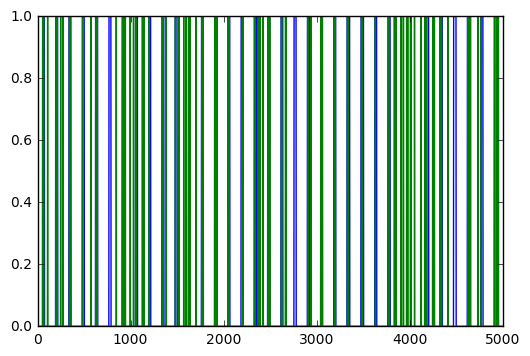

In [33]:
plt.plot(Y3_test[:5000])
plt.plot(Y3_pred[:5000])

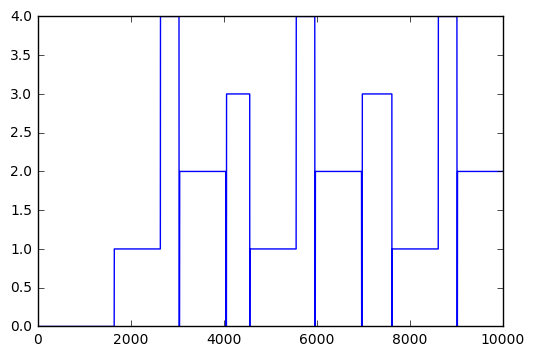

In [38]:
plt.plot(Y_s[0][:10000])